# **VesselBoost Toolbox**
## Module 2 - Test Time Adaptation
VesselBoost provides a Test Time Adaptation module for further optimization of a pre-trained model.

### Pre-trained models
We currently provide 3 pre-trained models (manual, om1, and om2) on Open Science Framework, which you can easily download by running the following cell:


In [2]:
import os
os.mkdir('./../saved_models/')
os.chdir('./../saved_models/')

!osf -p abk4p fetch /pretrained_models/manual_0429 ./manual_0429
# !osf -p abk4p fetch /pretrained_models/omelette1_0429 ./omelette1_0429
# !osf -p abk4p fetch /pretrained_models/omelette2_0429 ./omelette2_0429

100%|██████████████████████████████████| 26.4M/26.4M [00:00<00:00, 27.9Mbytes/s]


To illustrate the usage of our toolbox, we will download a public MRA dataset next:

In [4]:
# Download the data
!mkdir -p ./../data/img/
!osf -p nr6gc fetch /osfstorage/twoEchoTOF/withSkull/GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.nii ./../data/img/GRE_400um.nii

100%|████████████████████████████████████| 164M/164M [00:04<00:00, 34.4Mbytes/s]


### TTA without provided proxies 
You can use this module directly with your data, with and without a proxy segmentation. If a proxy segmentation is not provided, this module will automatically generate proxies with our pre-trained model, which are then used for TTA. Similar to *predict* module, there are four distinct settings for data preprocessing:
 - Set prep_mode to 1 for N4 bias field correction only;
 - Set prep_mode to 2 for denoising only;
 - Set prep_mode to 3 for both.;
 - Set prep_mode to 0 for no preprocessing.

If preprocessing is required, please explicitly pass a path to store the preprocessed images to **--ps_path** argument -- for more details, please refer to *Module_Prediction* notebook.
Below we illustrate the usage of this module with a sample MRA image and without preprocessing.

In [2]:
!mkdir -p ./../saved_imgs/generated_tta_label/
!python ./../test_time_adaptation.py --ds_path ./../data --out_path ./../saved_imgs/generated_tta_label/ --pretrained ./../saved_models/manual_0429 --prep_mode 4 --ep 5 --lr 1e-3 

TTA session will start shortly..
Aborting the preprocessing procedure!

No proxies are provided, strating generating proxies...
Running with GPU
Traceback (most recent call last):
  File "/home/eachand/VesselBoost/notebooks/./../test_time_adaptation.py", line 69, in <module>
    tta_process.test_time_adaptation(ps_path, px_path, out_path, out_mo_path, resource_opt)
  File "/home/eachand/VesselBoost/utils/train_utils.py", line 249, in test_time_adaptation
    inference_postpo(self.threshhold_vector[0], self.threshhold_vector[1], self.pretrained_model, processed_data_list[i], mip_flag=False)
  File "/home/eachand/VesselBoost/utils/module_utils.py", line 234, in __call__
    self.one_img_process(test_img_name, load_model, thresh, connect_thresh, mip_flag)
  File "/home/eachand/VesselBoost/utils/module_utils.py", line 164, in one_img_process
    raw_img = nib.load(raw_img_path)
  File "/home/eachand/.conda/envs/vessel_boost/lib/python3.9/site-packages/nibabel/loadsave.py", line 117, in loa

The maximum intensity projection image of the generated segmentation can be seen below:

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as img

mip_image = img.imread("./../saved_imgs/generated_tta_label/GRE_400um.jpg")
plt.imshow(mip_image, cmap='gray')

FileNotFoundError: [Errno 2] No such file or directory: './../saved_imgs/generated_tta_label/GRE_400um.jpg'

### TTA with provided proxies

Alternatevely, you can provide a proxy segmentation to be used for test time adaption. This segmentation can be created using any method, including manual segmentation or other, non-deep-learning methods. Note that the segmentation file name has to be the same as the raw image, but in a different location.\
This usage case is illustrated below:

In [10]:
!mkdir ./../saved_imgs/generated_tta_label_3/ 
!python ./../test_time_adaptation.py --ds_path ./../data/img/ --px_path ./../saved_imgs/generated_tta_label/proxies/ --out_path ./../saved_imgs/generated_tta_label_3/ --pretrained ./../saved_models/manual_0429 --prep_mode 4 --ep 5 --lr 1e-3 

./../saved_imgs/generated_tta_label_3/finetuned/ does not exist.
./../saved_imgs/generated_tta_label_3/finetuned/ has been created!
TTA session will start shortly..
Aborting the preprocessing procedure!

Proxies are provided!
Running with CPU
The chosen model is: ./../saved_models/manual_0429
Finetuning procedure starts!
Epoch: [1/5], Loss:  0.3694, Current learning rate:  0.00100000                 
Epoch: [2/5], Loss:  0.8265, Current learning rate:  0.00100000                 
Epoch: [3/5], Loss:  0.4959, Current learning rate:  0.00095000                 
Epoch: [4/5], Loss:  0.3957, Current learning rate:  0.00095000                 
Epoch: [5/5], Loss:  0.3938, Current learning rate:  0.00090250                 
100%|█████████████████████████████████████████████| 5/5 [02:03<00:00, 24.72s/it]
Training finished! Please wait for the model to be saved!

Model successfully saved! The location of the saved model is: ./../saved_imgs/generated_tta_label_3/finetuned/GRE_400um

Final thres

And here is the MIP image:

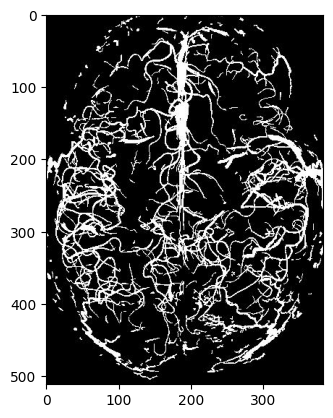

In [11]:
mip_image = img.imread("./../saved_imgs/generated_tta_label_3/GRE_400um.jpg")
plt.imshow(mip_image, cmap='gray')